## Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

test_path = '/Volumes/GoogleDrive/My Drive/Harvey Mudd/Work/Summer 2020/project_data/test_vectors/test_featureMat.csv'
train_path = '/Volumes/GoogleDrive/My Drive/Harvey Mudd/Work/Summer 2020/project_data/train_vectors/train_featureMat.csv'

#load the matrix
trainMat = pd.read_csv(train_path)
testMat = pd.read_csv(test_path)


## Plot X Acceleration

In [2]:
#select rows to use
trainMat_ = trainMat.copy()
testMat_ = testMat.copy()
#trainMat_ = trainMat_[np.logical_or(trainMat.label == 'wlk',trainMat.label == 'sit')]
#testMat_ = testMat_[np.logical_or(testMat.label == 'wlk',testMat.label == 'sit')]

#extract labels
train_labels = trainMat_['label'].values
#del trainMat_['label']

test_labels = testMat_['label'].values
#del testMat_['label']


#extract appropriate features
all_feats = trainMat_.columns
ax = [f for f in all_feats if 'a_x' in f]
ay = [f for f in all_feats if 'a_y' in f]
az = [f for f in all_feats if 'a_z' in f]

jogging = trainMat_[trainMat_.label == 'jog'][ax].to_numpy()
sitting = trainMat_[trainMat_.label == 'sit'][ay].to_numpy()


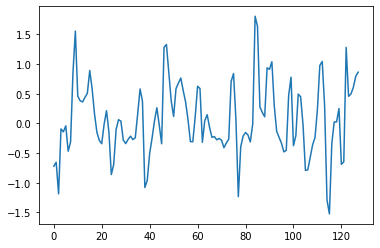

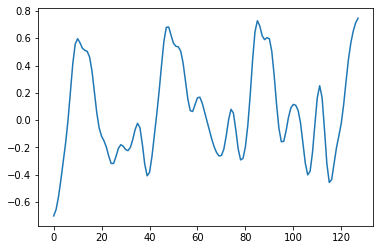

In [3]:
plt.figure()
plt.plot(jogging[1,:])
plt.figure()
plt.plot(gaussian_filter(jogging[1,:],2))
plt.show()

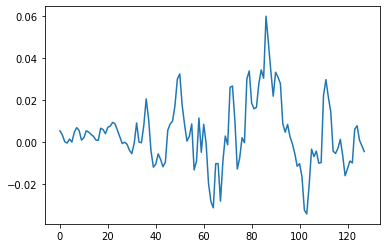

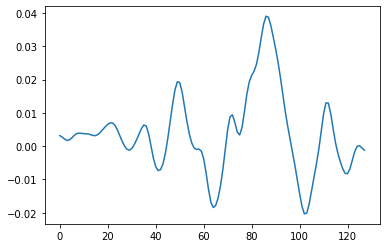

In [4]:
plt.figure()
plt.plot(sitting[1,:])
plt.figure()
plt.plot(gaussian_filter(sitting[1,:],2))
plt.show()

In [6]:
jogging.shape

(1618, 128)

In [7]:
sitting.shape

(3654, 128)

# Sphere Mapping

In [20]:
# get the vector for a single vector
jogging_ax = trainMat_[trainMat_.label == 'jog'][ax].to_numpy()
jogging_ay = trainMat_[trainMat_.label == 'jog'][ay].to_numpy()
jogging_az = trainMat_[trainMat_.label == 'jog'][az].to_numpy()

first_elem = np.vstack((jogging_ax[1,:], jogging_ay[1,:], jogging_az[1,:])).T
first_elem = np.apply_along_axis(lambda x: x/np.linalg.norm(x),arr=first_elem, axis = 1)

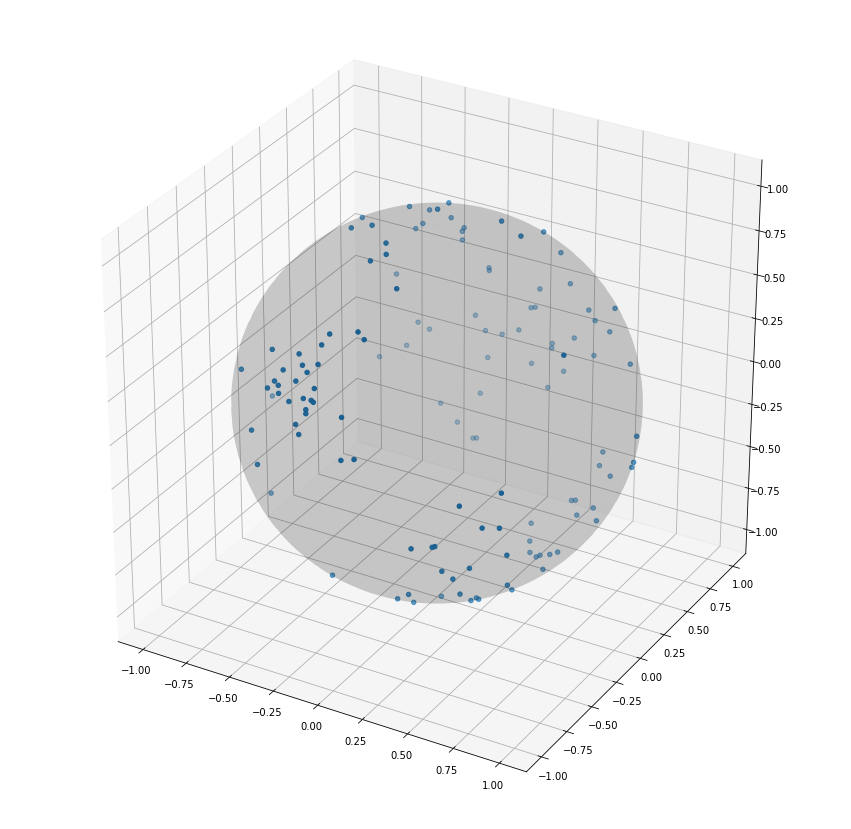

In [25]:
# draw sphere
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
matplotlib.pyplot.ion()
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,  projection='3d')

u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, color="k", alpha = .1)
ax.scatter(first_elem[:,0], first_elem[:,1], first_elem[:,2])

#plt.close()